# 基于 watch point 的实时内存带宽测量

`perf stat` 输出文件的路径

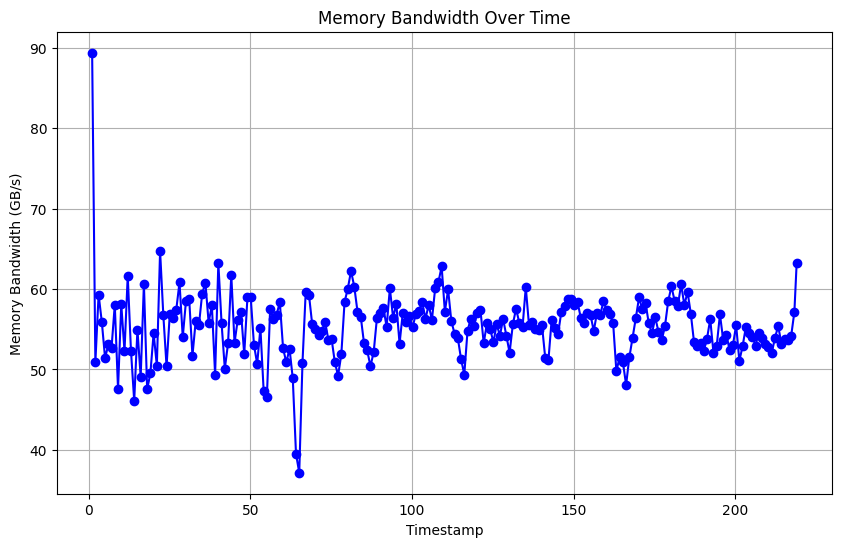

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(bw_all['timestamp'], bw_all['memory bandwidth (GB/s)'], marker='o', linestyle='-', color='b')
plt.title('Memory Bandwidth Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Memory Bandwidth (GB/s)')
plt.grid(True)
plt.show()


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

csv_dir = "../data/csv/watch_point/"

In [15]:
files = os.listdir(csv_dir)
print(files)

['500.perlbench_r_iter0_1732727831.csv', '500.perlbench_r_iter0_1732728050.csv', '500.perlbench_r_iter0_1732728160.csv', '502.gcc_r_iter0_1732730960.csv', '502.gcc_r_iter0_1732731046.csv', '502.gcc_r_iter0_1732731162.csv', '502.gcc_r_iter0_1732731290.csv', '502.gcc_r_iter0_1732731439.csv', '503.bwaves_r_iter0_1732760425.csv', '503.bwaves_r_iter0_1732760831.csv', '503.bwaves_r_iter0_1732761489.csv', '503.bwaves_r_iter0_1732761996.csv', '505.mcf_r_iter0_1732735580.csv', '507.cactuBSSN_r_iter0_1732764322.csv', '508.namd_r_iter0_1732765783.csv', '510.parest_r_iter0_1732772409.csv', '511.povray_r_iter0_1732776073.csv', '519.lbm_r_iter0_1732783693.csv', '520.omnetpp_r_iter0_1732740779.csv', '521.wrf_r_iter0_1732791309.csv', '523.xalancbmk_r_iter0_1732743836.csv', '525.x264_r_iter0_1732745586.csv', '525.x264_r_iter0_1732745632.csv', '525.x264_r_iter0_1732745755.csv', '526.blender_r_iter0_1732793840.csv', '527.cam4_r_iter0_1732796372.csv', '531.deepsjeng_r_iter0_1732747080.csv', '538.imagick_r

C:\Users\ERQI\AppData\Local\Temp\ipykernel_19716\235888423.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


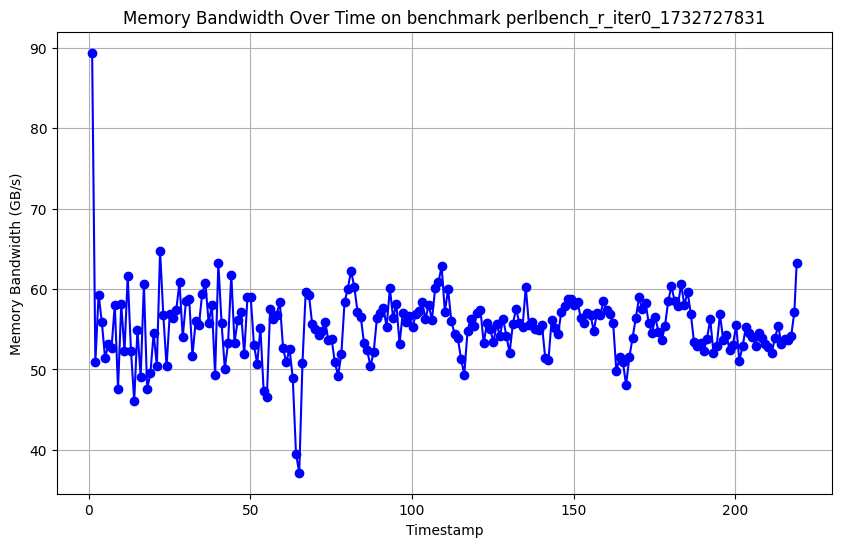

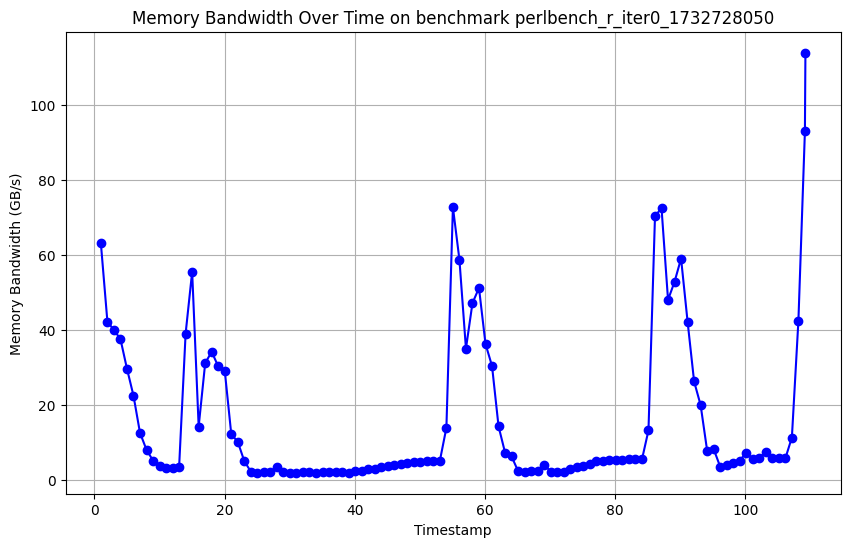

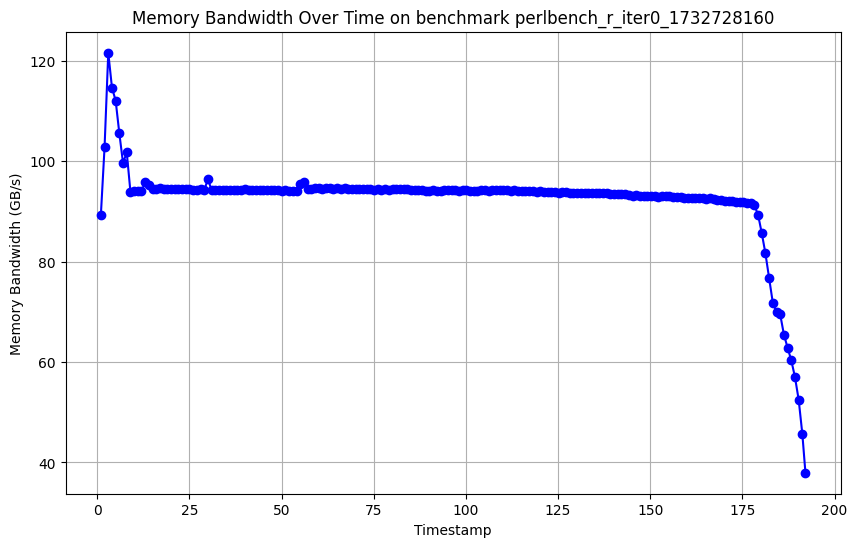

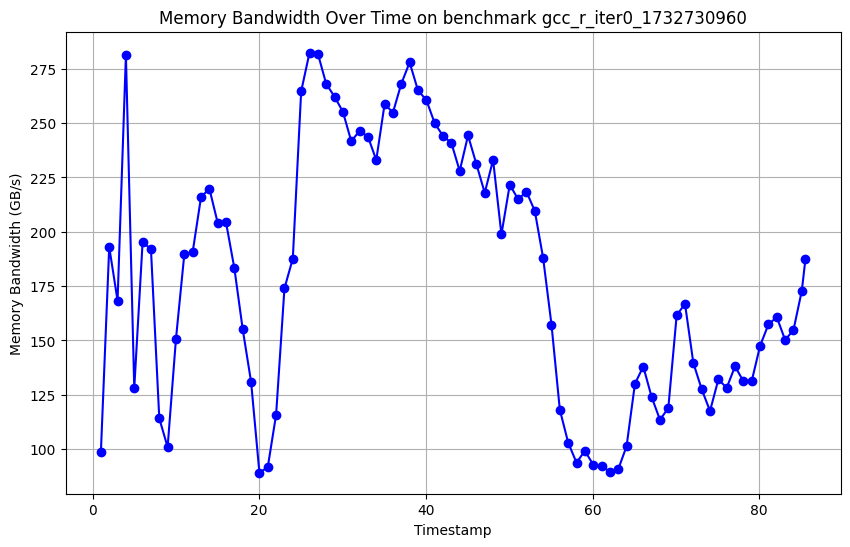

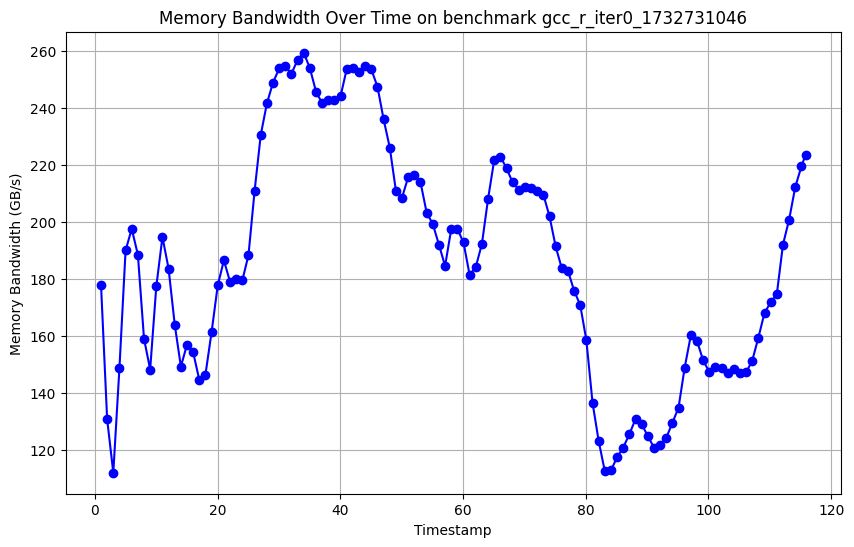

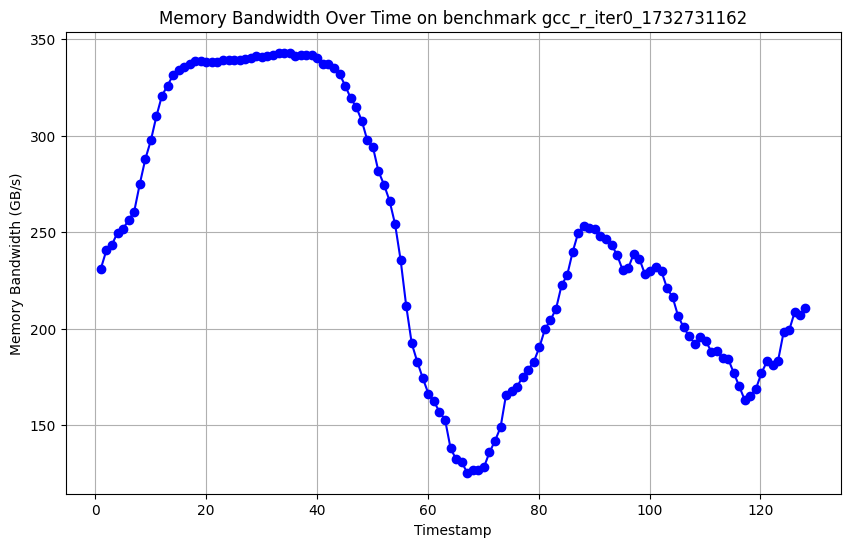

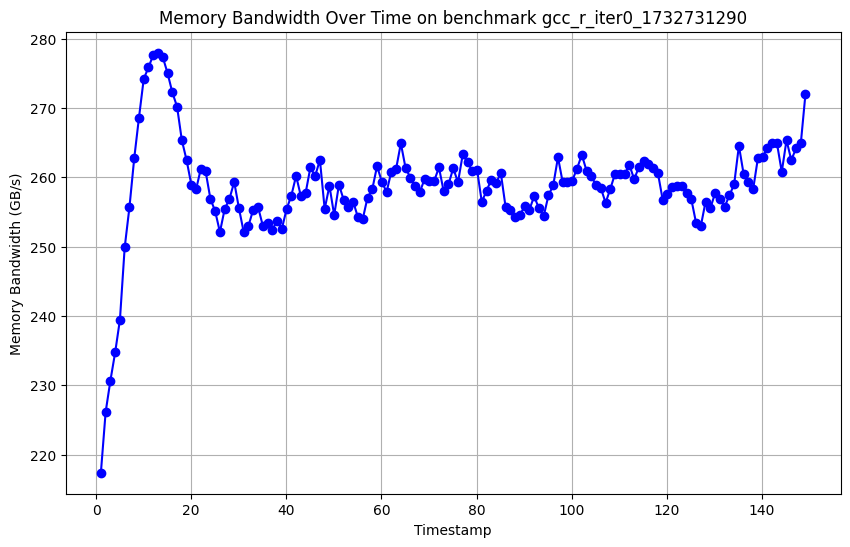

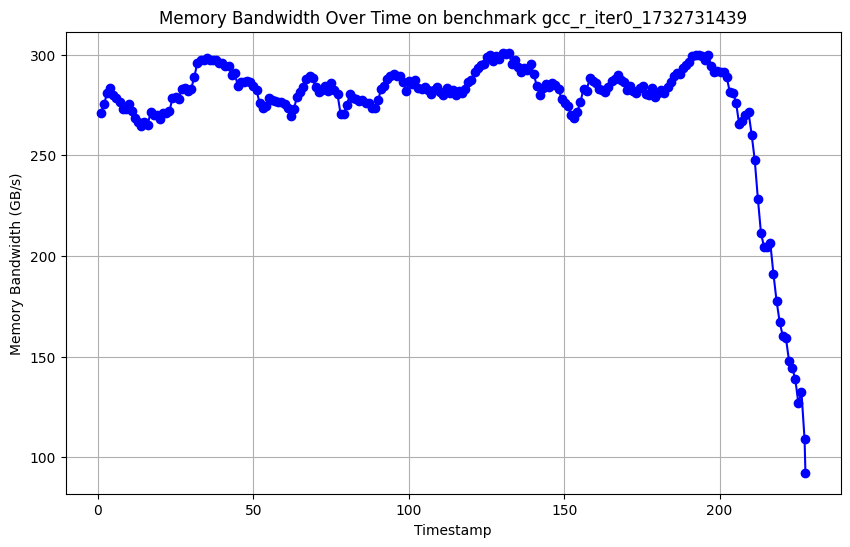

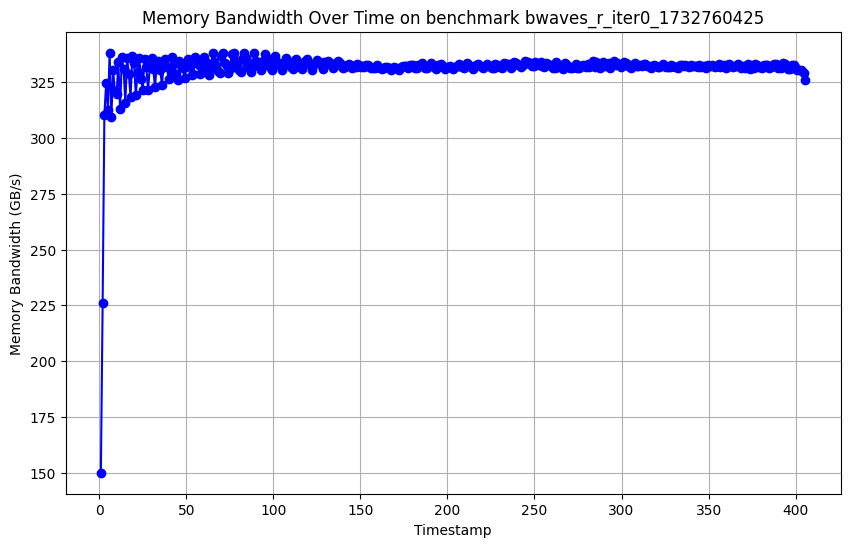

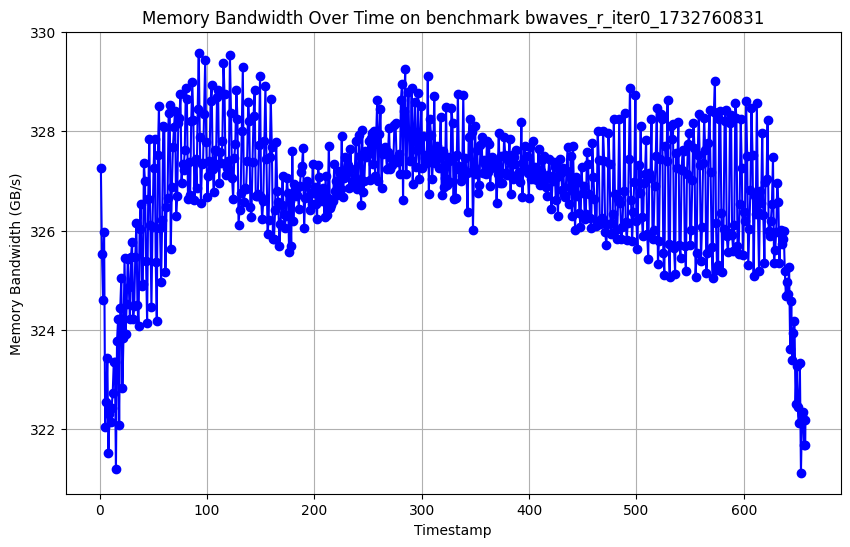

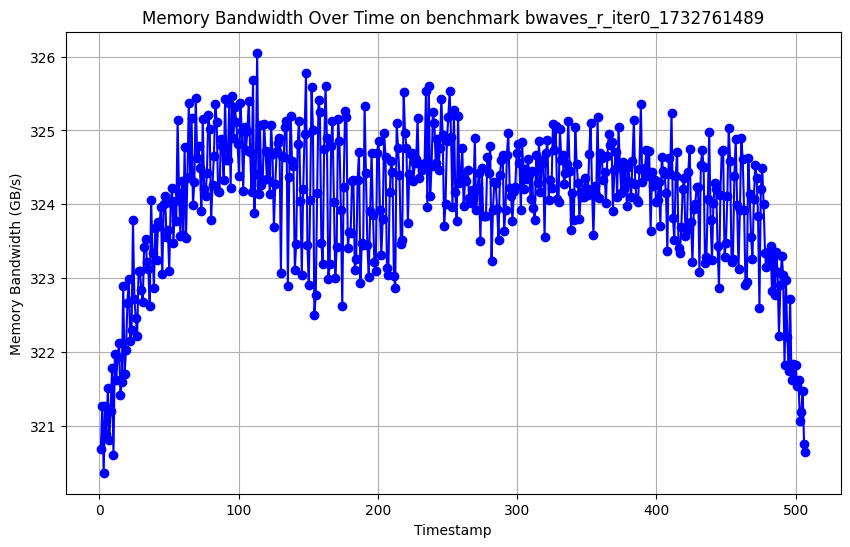

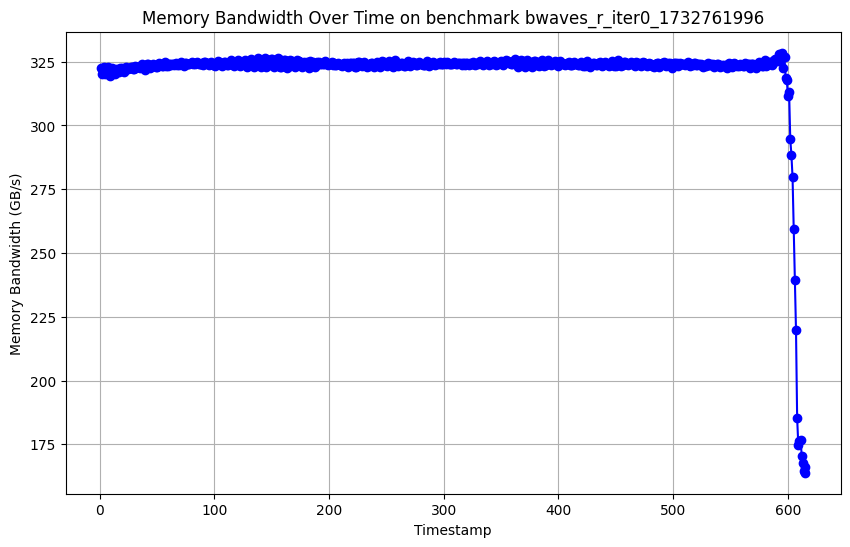

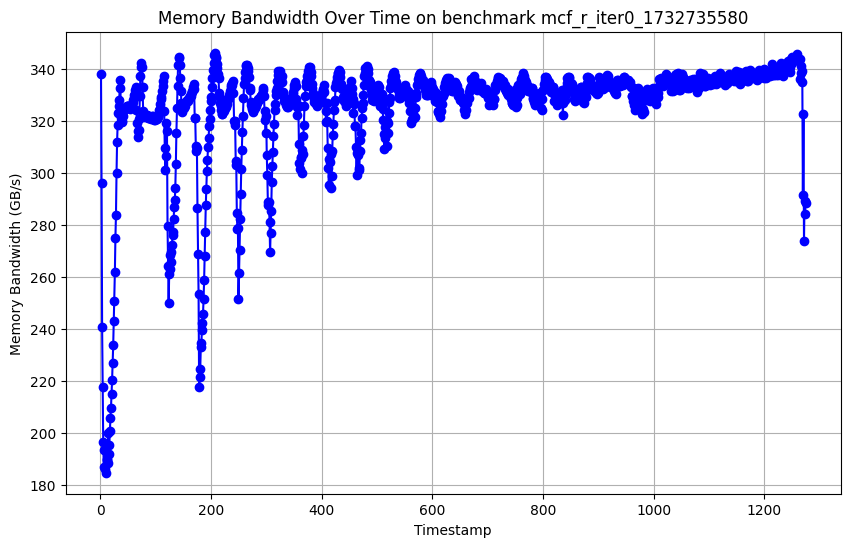

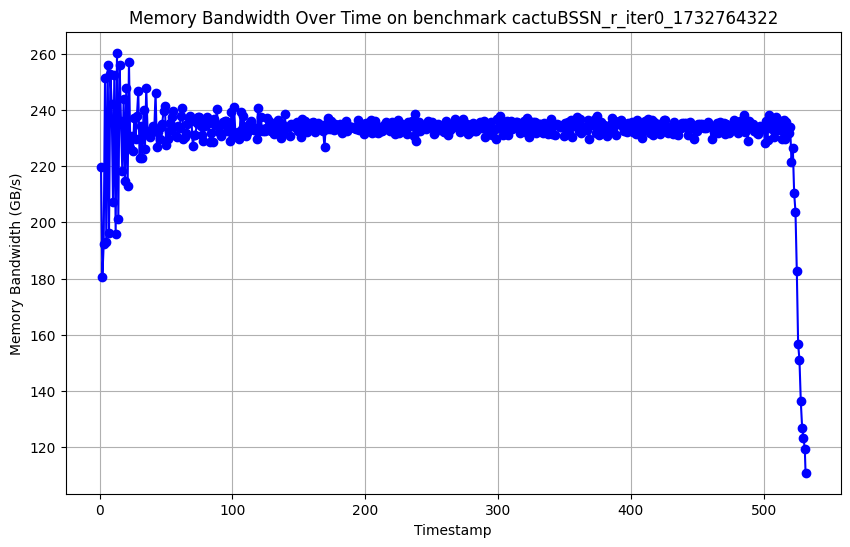

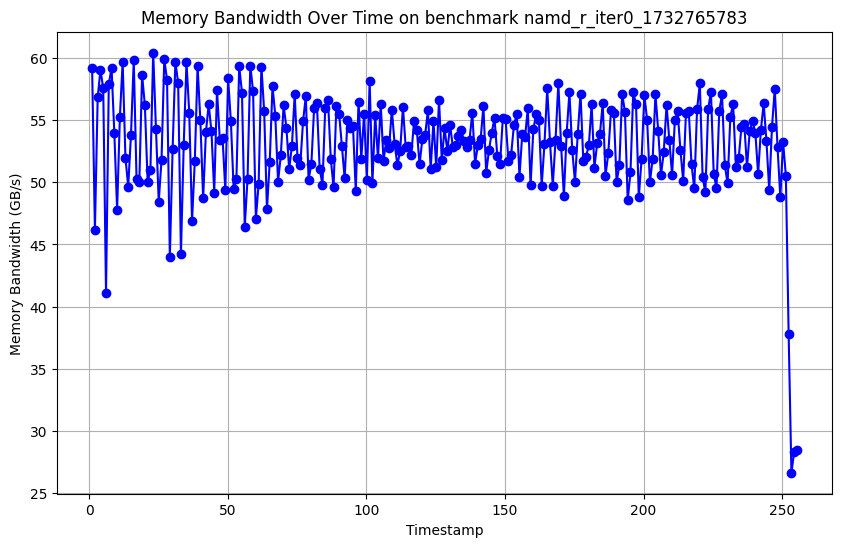

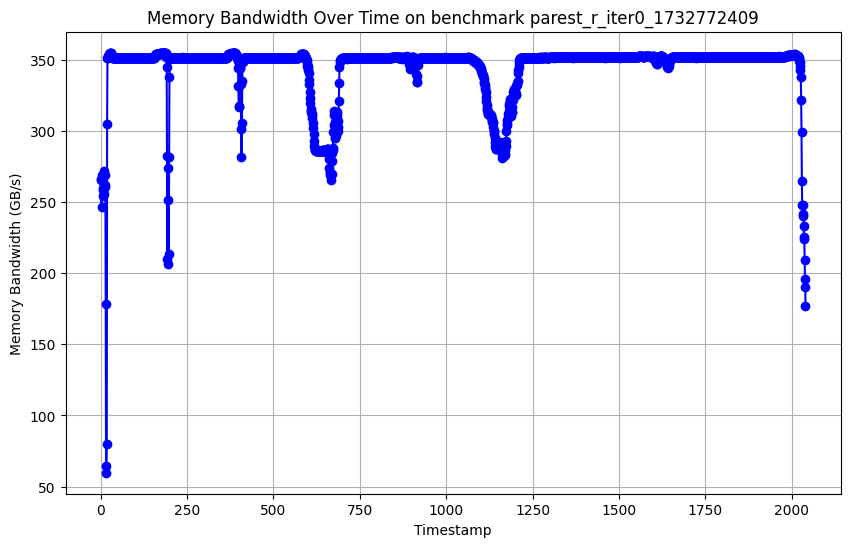

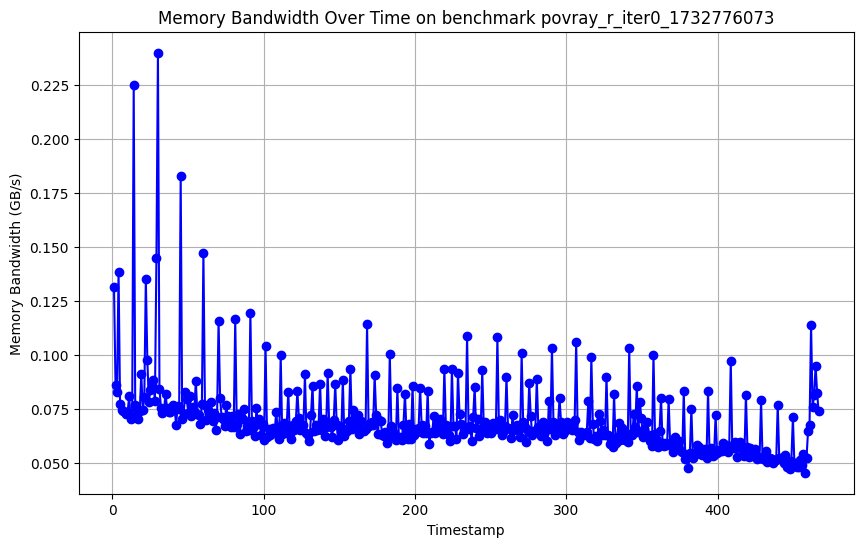

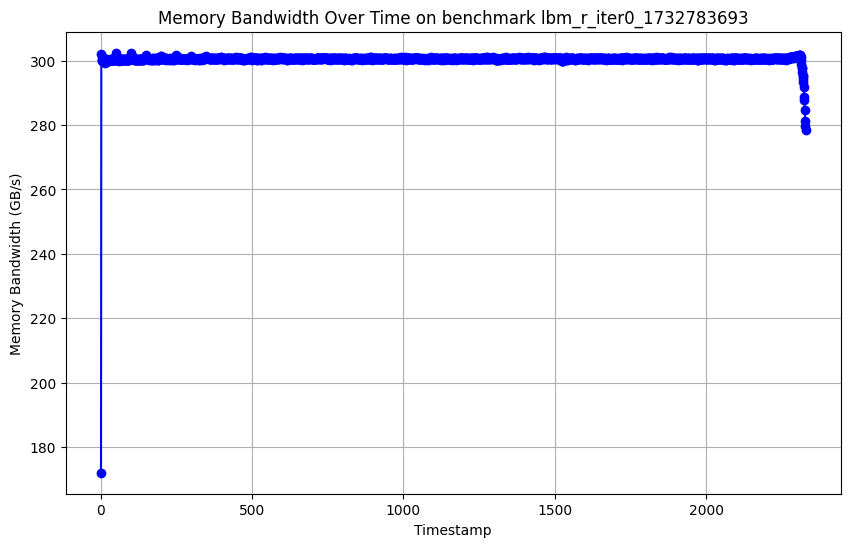

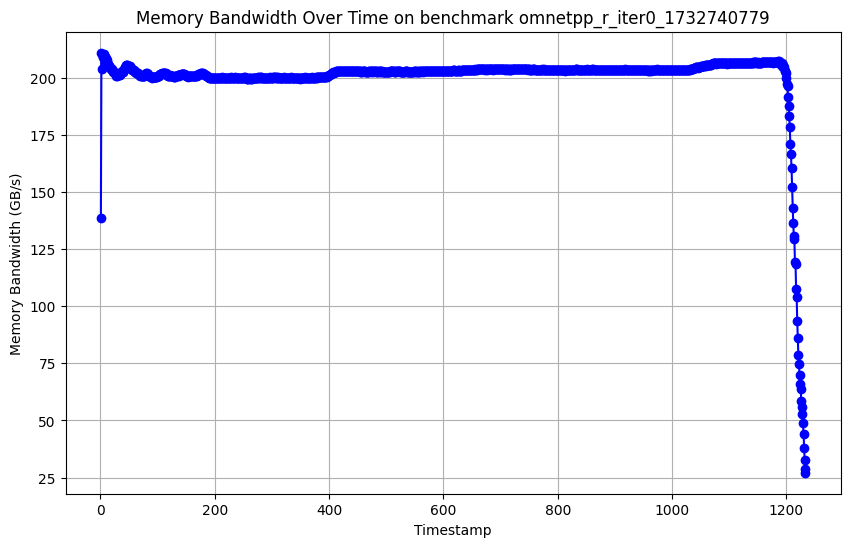

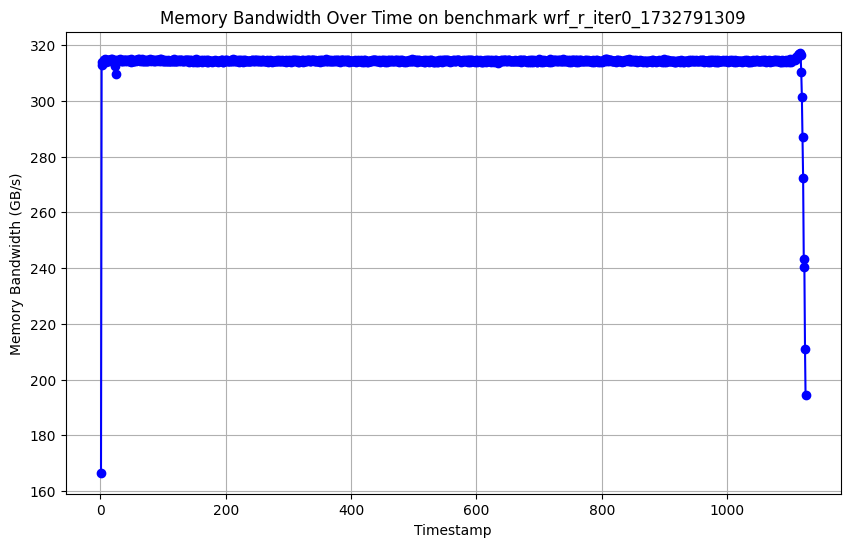

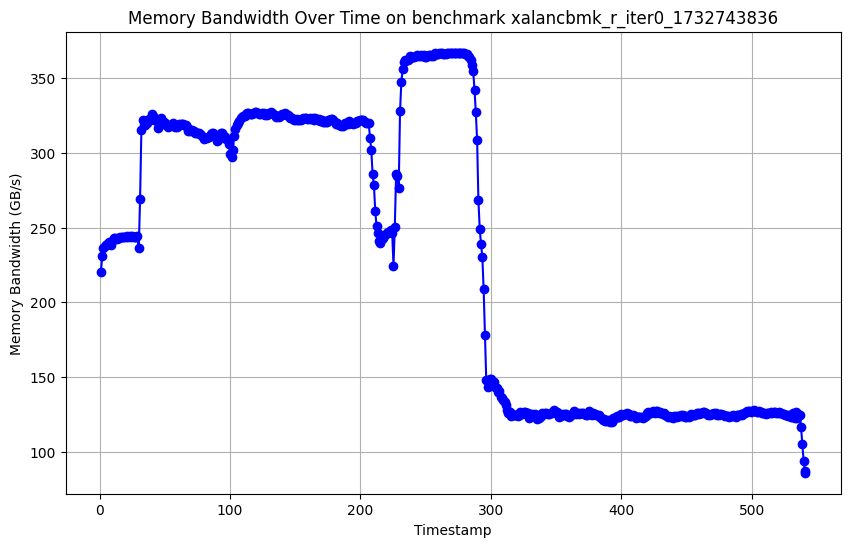

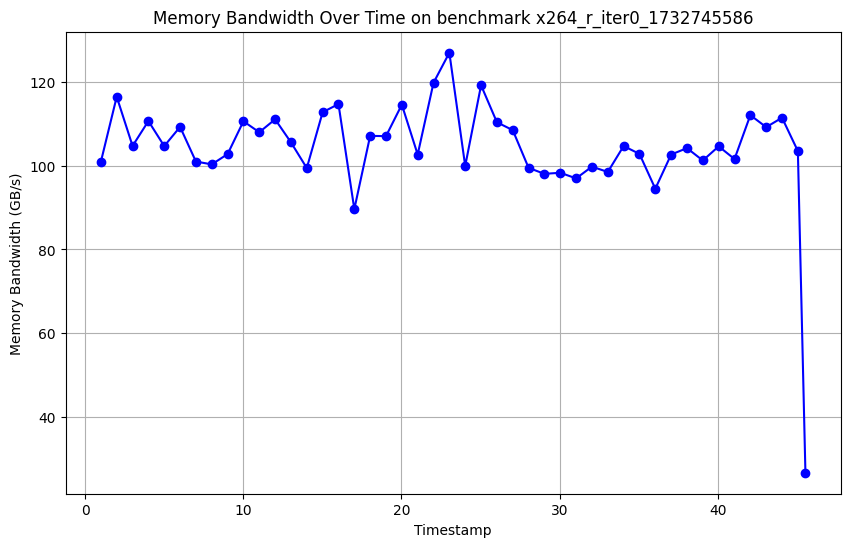

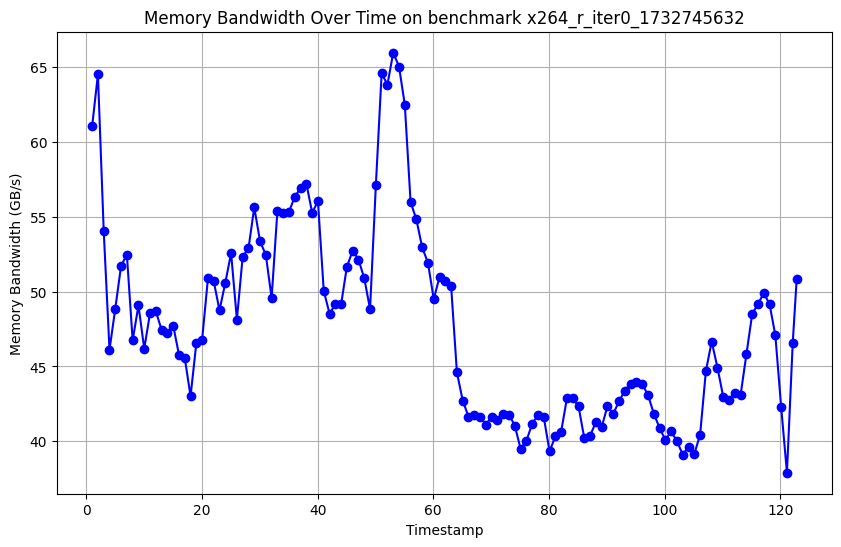

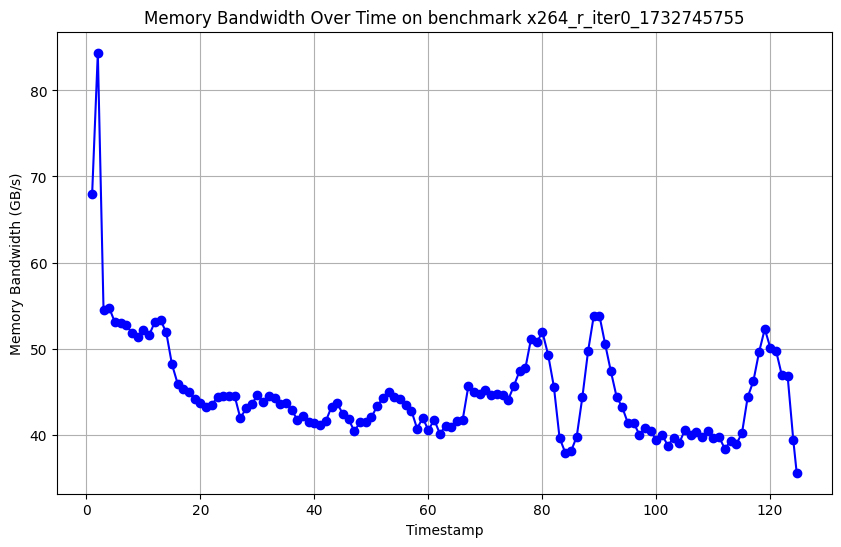

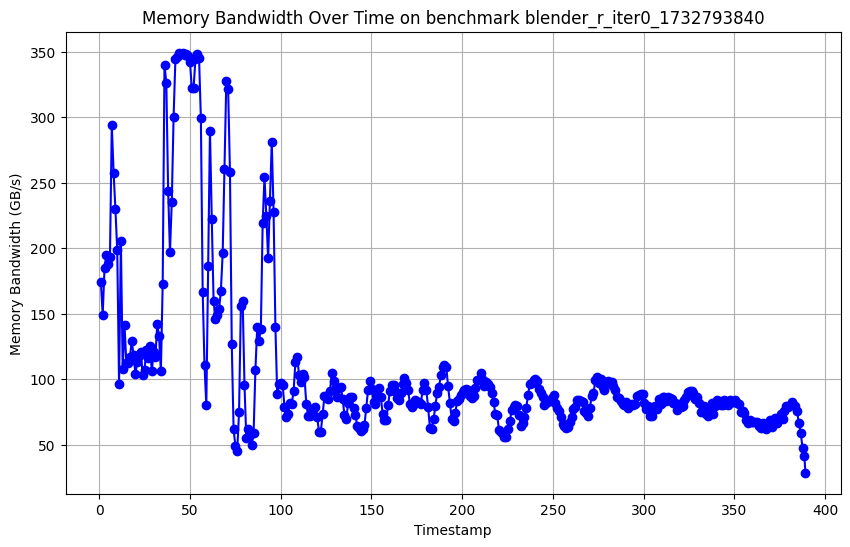

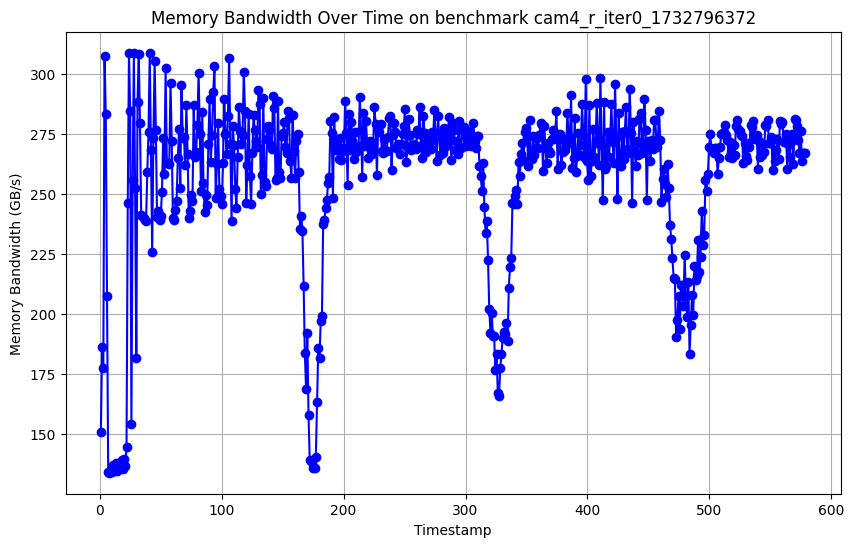

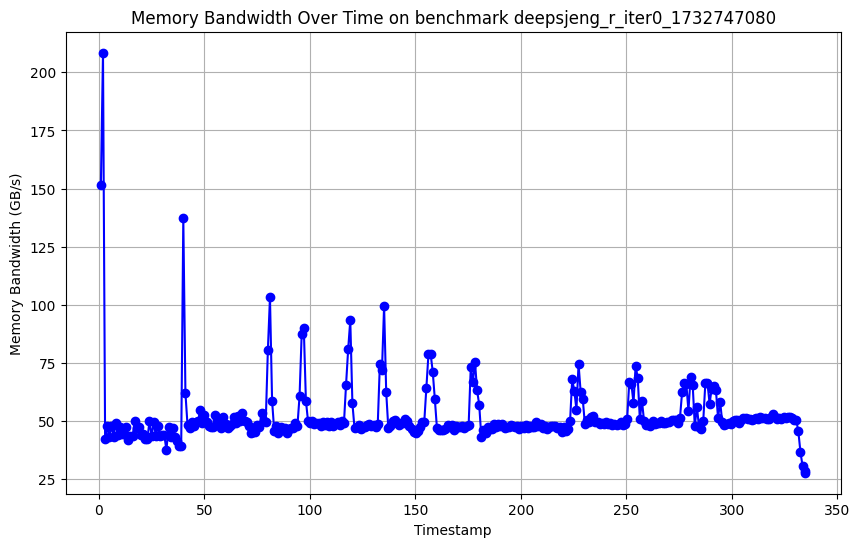

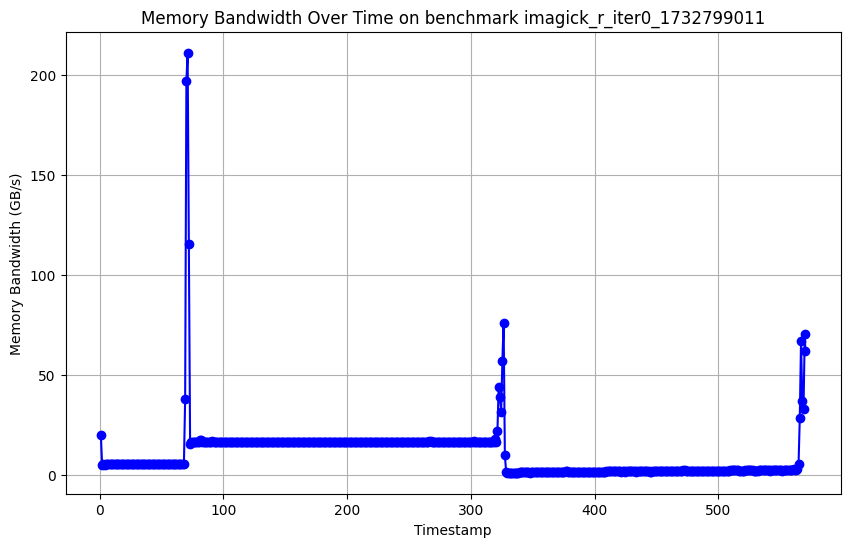

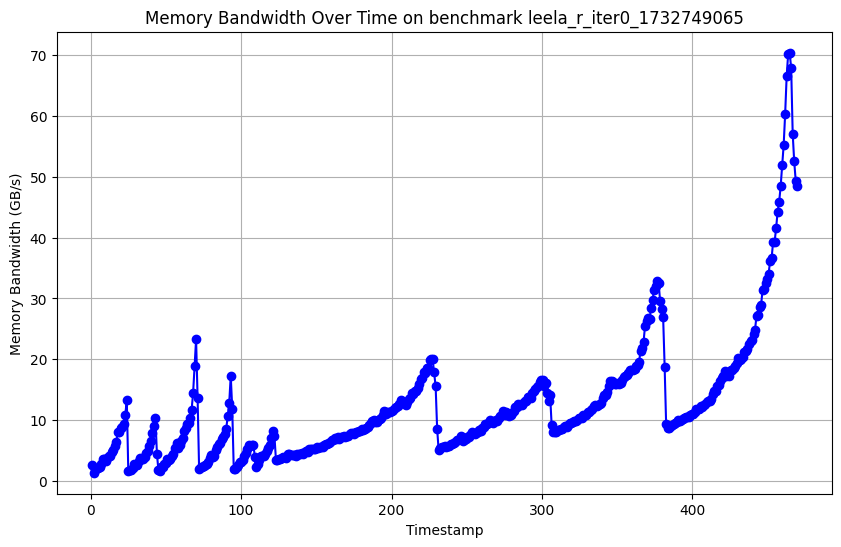

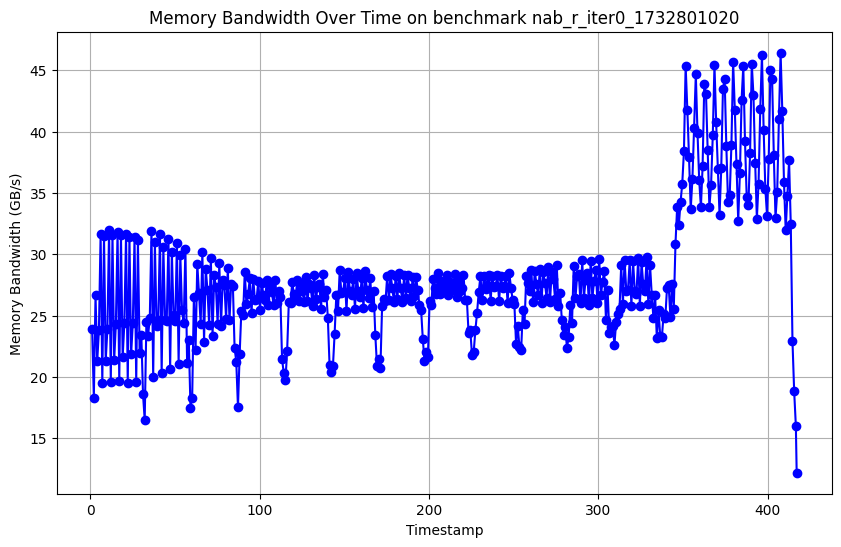

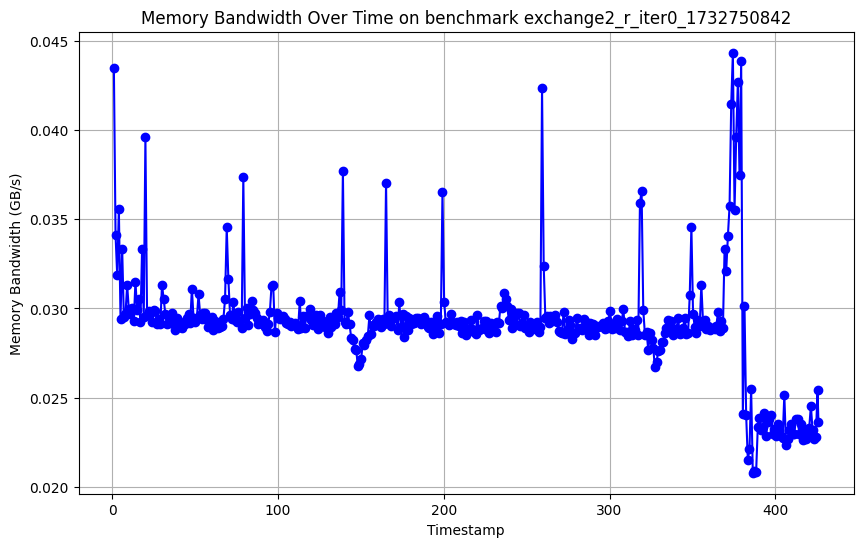

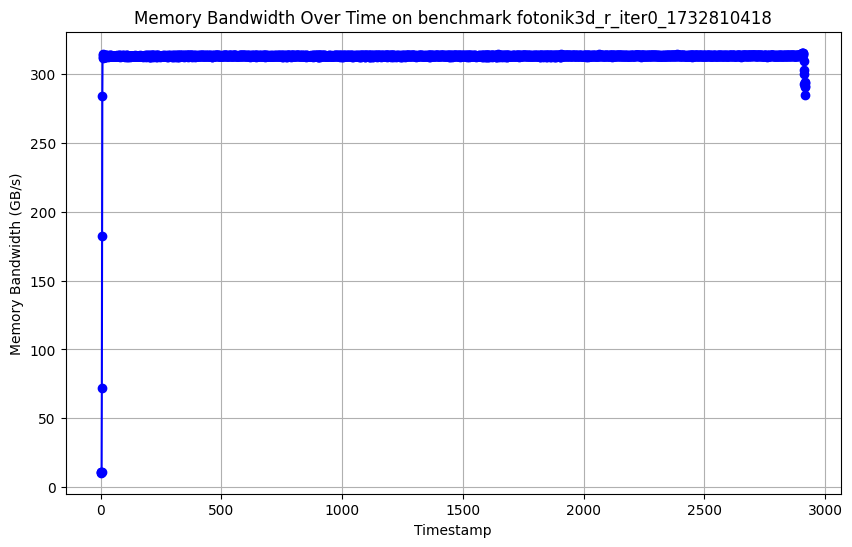

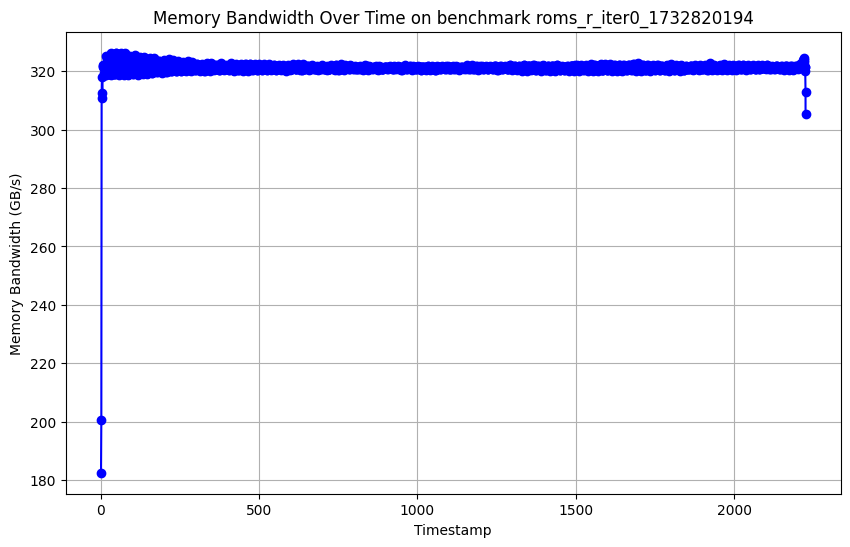

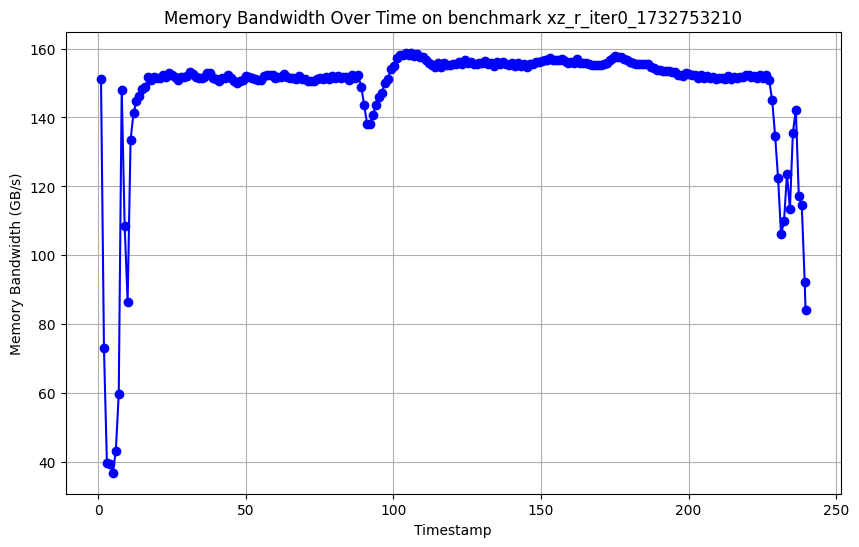

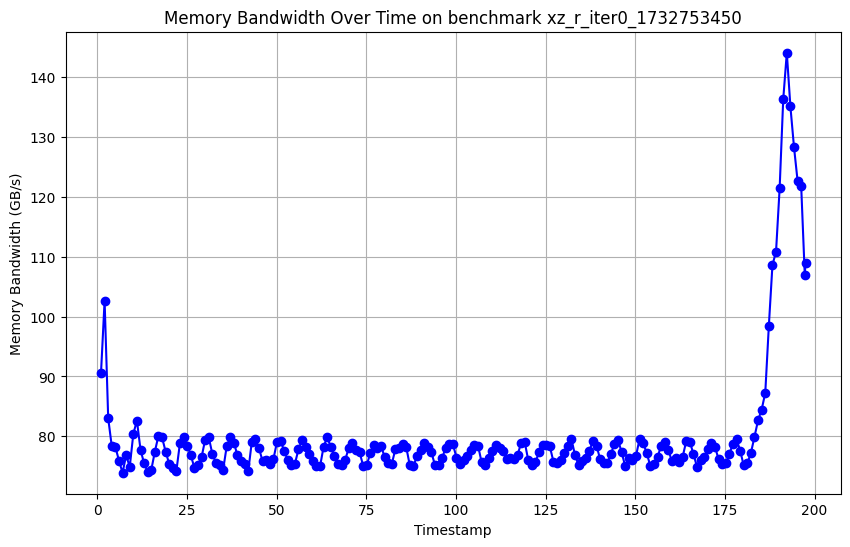

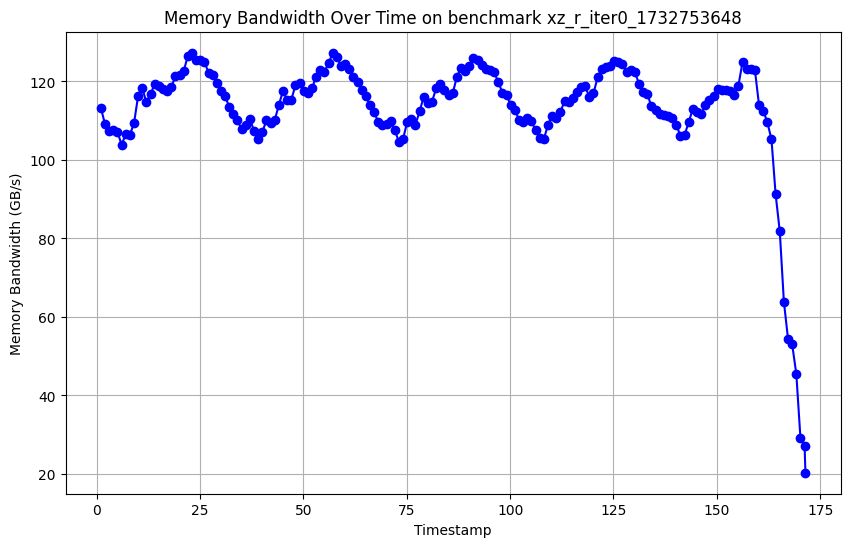

In [ ]:
for data_csv in files:
    perf_raw_path = csv_dir + data_csv
    perf_raw_data = pd.read_csv(perf_raw_path,
                                sep='|',
                                header=None, 
                                names=["timestamp", "value", "event"], 
                                usecols=[0, 1, 3])
    
    
    # perf_raw_data['type'] = perf_raw_data['event'].apply(
    #     lambda x: 'reqs' if 'reqs'in x else 'retries'
    # )
    # perf_raw_data['socket'] = perf_raw_data['event'].apply(
    #     lambda x: 0 if x[8] == '0' else '1'
    # )
    perf_raw_data = perf_raw_data.drop('event', axis=1)

    # perf_raw_data.loc[perf_raw_data["type"] == "retries", "value"] *= -1

    
    bw_all = perf_raw_data.groupby(['timestamp']).agg(value=('value', 'sum')).reset_index()

    bw_all['interval'] = bw_all['timestamp'].diff()
    bw_all.loc[0, 'interval'] = bw_all.loc[0, 'timestamp']

    bw_all['memory bandwidth (GB/s)'] = (bw_all['value'] * 32) / (bw_all['interval'] * 1000000000)


    plt.figure(figsize=(10, 6))
    plt.plot(bw_all['timestamp'], bw_all['memory bandwidth (GB/s)'], marker='o', linestyle='-', color='b')
    plt.title('Memory Bandwidth Over Time on benchmark ' + data_csv.split(".")[1])
    plt.xlabel('Timestamp')
    plt.ylabel('Memory Bandwidth (GB/s)')
    plt.grid(True)
    plt.savefig(f'../data/images/watch_point/{data_csv.split(".")[0] + "_" + data_csv.split(".")[1] + ".png"}')